<center> <span style="color:indigo">Machine Learning e Inferencia Bayesiana</span> </center> 

<div style="text-align: center;">
<img src="../Imagenes/CUGDL_logo.png" alt="Drawing" style="width: 800px;"/>
</div>

<center> <span style="color:DarkBlue">  Tema 3. Distribuciones de probabilidad </span>  </center>
<center> <span style="color:Blue"> Profesor: M. en C. Iván A. Toledano Juárez </span>  </center>

# Análisis del Dataset Babyboom: Explorando Distribuciones de Probabilidad

# 🍼 Exploración de Distribuciones con un Dataset Real de Nacimientos

En este notebook exploraremos un pequeño pero interesante conjunto de datos reales que contiene información sobre 44 bebés nacidos en un hospital de Brisbane, Australia, durante un periodo de 24 horas. El dataset incluye variables como la hora de nacimiento, el sexo del bebé, su peso al nacer y el tiempo transcurrido desde la medianoche hasta el nacimiento. A lo largo de este análisis, utilizaremos estas variables para examinar cómo algunas distribuciones estadísticas comunes —como la binomial, geométrica, Poisson, exponencial y normal— pueden modelar distintos aspectos del fenómeno observado. La idea es combinar teoría con práctica, aplicando métodos gráficos y estadísticos que te permitan identificar qué tan bien (o mal) se ajustan estas distribuciones a los datos reales.

### Descripción del Dataset

El dataset Babyboom contiene información sobre nacimientos ocurridos en un hospital durante un período de 24 horas. Este conjunto de datos es particularmente útil para ilustrar conceptos fundamentales de probabilidad y estadística debido a su naturaleza temporal y las características naturales de los eventos de nacimiento.

**Variables del dataset:**
- **Time**: Hora del nacimiento en formato HHMM (24 horas)
- **Gender**: Género del bebé (1 = femenino, 2 = masculino)
- **Weight**: Peso del bebé al nacer (en gramos)
- **Mins**: Minutos transcurridos desde la medianoche hasta el nacimiento

## Carga y Exploración Inicial de los Datos

Comenzaremos cargando el dataset y realizando una exploración inicial para familiarizarnos con la estructura y características básicas de los datos.

In [1]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

In [2]:
# Carga del dataset
df_baby = pd.read_csv("../data/babyboom/Babyboom.csv", sep="\t") # los datos están separados por un tab
df_baby.head()

,Time,Gender,Weight,Mins
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [3]:
# Dimensiones
df_baby.shape

(44, 4)

Tenemos 44 filas, correspondientes a los 44 nacimientos durante el día. Y tenemos las 4 variables o características mencionadas en la documentación.

In [4]:
# Información del dataset
df_baby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Time    44 non-null     int64
 1   Gender  44 non-null     int64
 2   Weight  44 non-null     int64
 3   Mins    44 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


In [5]:
# Estadísticas del dataset
df_baby.describe()

,Time,Gender,Weight,Mins
count,44.000000,44.000000,44.000000,44.000000
mean,1296.000000,1.590909,3275.954545,788.727273
std,690.704561,0.497350,528.032458,416.066931
min,5.000000,1.000000,1745.000000,5.000000
25%,792.750000,1.000000,3141.500000,482.750000
50%,1406.500000,2.000000,3404.000000,846.500000
75%,1918.500000,2.000000,3571.750000,1158.500000
max,2355.000000,2.000000,4162.000000,1435.000000


## 🎲 Trabajando con Distribuciones Usando `scipy.stats`

Para explorar cómo distintos modelos probabilísticos pueden describir fenómenos reales, utilizaremos la biblioteca `scipy.stats`, una de las herramientas más completas y accesibles en Python para manejar distribuciones de probabilidad. Esta librería nos permite trabajar tanto con distribuciones discretas (como la binomial, Poisson o geométrica) como continuas (como la normal o exponencial), y ofrece funciones para calcular probabilidades, generar valores aleatorios, ajustar distribuciones a datos reales y visualizar funciones de densidad y de distribución acumulada. A lo largo del notebook, usaremos `scipy.stats` para comparar los datos del conjunto de nacimientos con distintas distribuciones teóricas, ajustar sus parámetros y evaluar qué tan bien modelan el comportamiento observado. Este enfoque práctico nos permitirá conectar la teoría con la evidencia empírica de manera directa.


## Distribución Geométrica

La **distribución geométrica** modela el número de ensayos necesarios hasta obtener el **primer éxito** en una secuencia de ensayos de Bernoulli independientes, donde cada ensayo tiene dos posibles resultados: **éxito** (con probabilidad $p$) o **fracaso** (con probabilidad $1 - p$).

Se utiliza, por ejemplo, para modelar:

- El número de lanzamientos de una moneda hasta obtener cara.
- La cantidad de intentos en un juego hasta ganar por primera vez.
- El número de nacimientos hasta que nace un niño.

Se denota como:

\begin{equation}
X \sim \text{Geom}(p)
\end{equation}

donde:
- $p$: probabilidad de éxito en cada ensayo.
- $x$: variable aleatoria que representa el número de ensayos hasta el primer éxito.


#### Función de probabilidad (PMF)

La función de masa de probabilidad (PMF) de la distribución geométrica es:

\begin{equation}
P(X = k) = (1 - p)^{k - 1} p
\end{equation}

donde:
- $k$: número de ensayos hasta el primer éxito ($k = 1, 2, 3, \dots$).


#### Propiedades

- **Media**:
  \begin{equation}
  \mu = \frac{1}{p}
  \end{equation}

- **Varianza**:
  \begin{equation}
  \sigma^2 = \frac{1 - p}{p^2}
  \end{equation}

A continuación, vamos a revisar si el número de eventos observados para tener un bebé del mismo género sigue esta distribución. Aquí vamos a suponer que la probabilidad de **éxito** (relacionado con el nacimiento de un niño) es de $p=0.5$.

In [6]:
# Queremos construir un plot de probabilidad vs variable aleatoria
# En este caso la variable aleatoria es el numero de intentos hasta volver a ver el nacimiento de un niño

# Construimos primero nuestro rango de intentos. 
# En teoría, podríamos tener un mínimo de 1 y un máximo de 44 intentos hasta volver a ver un bebé del mismo género.
x_tries = np.arange(1,45,1)

# Construimos las frecuencias, que inicializamos en cero para irlas llenando
y_freq = 44*[0]

count = 0 # Contador que lleva el registro del número de intentos
for baby in df_baby['Gender'].iloc[1:]: # Empezamos el loop a partir de la tercera observación, donde está el primer niño
    if baby==2:                # Si encuentra una niña (éxito) aumenta la frecuencia en 1 unidad, para es número de intentos x
        y_freq[count] += 1
        count = 0
    else:
        count += 1

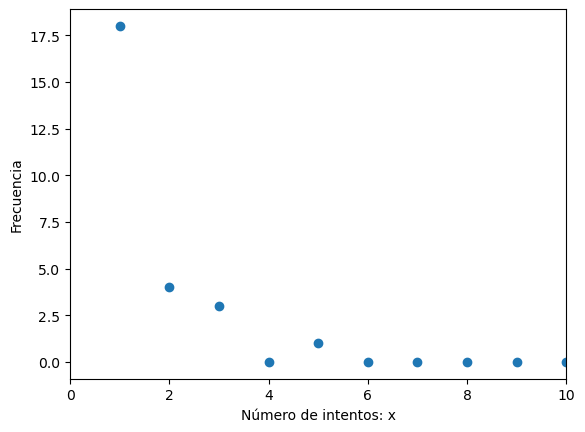

In [7]:
# Plot de frecuencia vs variable aleatoria

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(x=x_tries,
           y=y_freq)
ax.set_xlabel('Número de intentos: x')
ax.set_ylabel('Frecuencia')
ax.set_xlim(0,10)

plt.show()

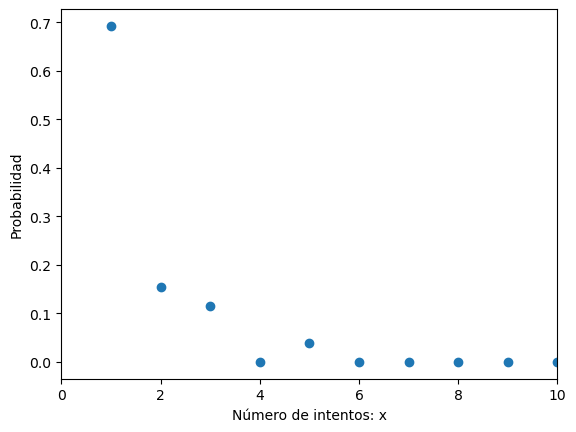

In [8]:
# Plot de probabilidad vs variable aleatoria
# Hasta ahora solo hemos tomado la frecuencia, para pasarlo a una probabilidad tenemos que dividir entre todos los casos
y_prob = y_freq / np.sum(y_freq)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(x=x_tries,
           y=y_prob)
ax.set_xlabel('Número de intentos: x')
ax.set_ylabel('Probabilidad')
ax.set_xlim(0,10)

plt.show()

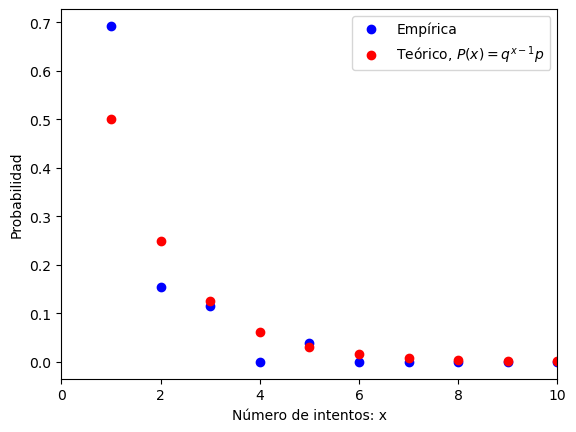

In [9]:
# Comparación entre la curva teórica y empírica

dist_geom = st.geom(p=0.5) # instanciamos el objeto asociado a la distribución, con parámetro p = 0.5

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(x=x_tries,
           y=y_prob,
           color='blue',
           label='Empírica')
ax.scatter(x=x_tries,
           y=dist_geom.pmf(x_tries), ## accedemos a métodos pmf (probability mass function)
           color='red',
           label=r'Teórico, $P(x) = q^{x-1}p$')
ax.set_xlabel('Número de intentos: x')
ax.set_ylabel('Probabilidad')
ax.set_xlim(0,10)

ax.legend()

plt.show()

Al comparar la distribución geométrica empírica (obtenida a partir del número de nacimientos hasta volver a observar a un niño) con la distribución geométrica teórica, observamos que ambas siguen un patrón muy similar. Esto sugiere que el modelo de distribución geométrica es una representación razonable del proceso observado en los datos reales. Aunque hay pequeñas diferencias puntuales en algunas frecuencias —posiblemente debidas al tamaño reducido de la muestra—, la forma general de la distribución, con alta probabilidad en los primeros intentos y caída exponencial posterior, se conserva. Este tipo de comparación nos ayuda a validar si una distribución teórica puede ser utilizada para modelar un fenómeno aleatorio específico, reforzando la conexión entre teoría probabilística y observaciones empíricas.

## Distribución Binomial

La **distribución binomial** modela el número de éxitos en $n$ ensayos independientes, donde cada ensayo tiene dos posibles resultados: **éxito** (con probabilidad $p$) o **fracaso** (con probabilidad $1 - p$). En nuestro caso, puede utilizarse para modelar la cantidad de niños nacidos en un conjunto de $n = 44$ nacimientos, si asumimos que cada nacimiento es independiente y que la probabilidad de tener un niño es constante.

Se utiliza comúnmente en situaciones como:

- Encuestas con respuestas "sí/no".
- Pruebas de calidad en líneas de producción.
- Resultados de juegos con probabilidad fija de ganar.

Se denota como:

\begin{equation}
X \sim \text{Bin}(n, p)
\end{equation}

donde:
- $n$: número total de ensayos o repeticiones,
- $p$: probabilidad de éxito en un solo ensayo,
- $X$: variable aleatoria que representa el número de éxitos.

#### Función de probabilidad (PMF)

La función de masa de probabilidad para la binomial es:

\begin{equation}
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
\end{equation}

donde:
- $\binom{n}{k}$ representa el número de combinaciones posibles de $k$ éxitos en $n$ intentos.

#### Propiedades

- **Media**:
  \begin{equation}
  \mu = n \cdot p
  \end{equation}

- **Varianza**:
  \begin{equation}
  \sigma^2 = n \cdot p \cdot (1 - p)
  \end{equation}


In [10]:
df_baby.groupby("Gender").size()

Gender
1    18
2    26
dtype: int64

Observamos que tenemos 26 nacimientos de niños. Lo que sigue es ver si esta cifra es consistente la probabilidad que uno calcularía con una distribución binomial. Para crear esta distribución binomial teórica suponemos $n = 44$ número de nacimientos y $p=0.5$ probabilidad de éxito (de tener el nacimiento de un niño).

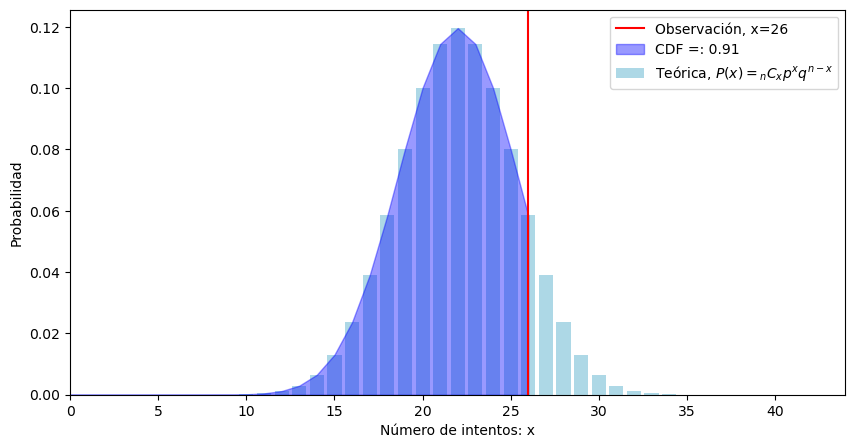

In [11]:
dist_binom = st.binom(n=44, p=0.5) # instanciamos la distribucion y sus parámetros

x_tries = np.arange(0,45,1)# variable aleatoria, número de casos de éxito
x_cdf = np.arange(0,27,1) ## rango de la distribución acumulada, hasta x=26

fig = plt.figure(figsize=(10,5))

# Primera figura
ax = fig.add_subplot(111)
ax.bar(x=x_tries,
       height=dist_binom.pmf(x_tries),
       color='lightblue',
       label=r'Teórica, $P(x)=_nC_x p^x q^{n-x}$')
ax.axvline(x=26,
           color='red',
           label='Observación, x=26')
ax.fill_between(x_cdf, dist_binom.pmf(x_cdf), color='blue', alpha=0.4,
                 label=f'CDF =: {round(dist_binom.cdf(26),2)}') # usamos el valor de la cdf con el método cdf()
ax.set_xlabel('Número de intentos: x')
ax.set_ylabel('Probabilidad')
ax.set_xlim(0,44)

ax.legend()

plt.show()

Al modelar el número de niños nacidos con una distribución binomial de parámetros $n = 44$ y $p = 0.5$, encontramos que la probabilidad de observar **al menos 26 bebés del mismo sexo** no es particularmente baja ($\sim$ 9%). Aunque a simple vista puede parecer un desequilibrio notable (26 niños vs. 18 niñas), el cálculo con la distribución binomial muestra que este tipo de desviación entra dentro de lo esperable por azar. De hecho, el valor observado no se encuentra en una cola extrema de la distribución, lo que sugiere que no hay suficiente evidencia para considerar este resultado como inusual bajo la hipótesis de igualdad de probabilidad entre sexos. En otras palabras, **tener 26 bebés del mismo género en 44 nacimientos no es un evento muy raro** y puede explicarse como una fluctuación natural dentro de un proceso aleatorio.

## Distribución de Poisson

La **distribución de Poisson** es una distribución discreta que modela el número de veces que ocurre un evento en un intervalo fijo de tiempo o espacio, **bajo la suposición de que los eventos ocurren de manera independiente y a una tasa promedio constante**. En el contexto de nuestro dataset, podemos usarla para modelar el número de nacimientos por hora durante el periodo de 24 horas en el hospital. Esto nos permite responder preguntas como: ¿es razonable esperar 3 o más nacimientos en una hora? o ¿cuál es la probabilidad de que en una hora no haya nacimientos?

Se denota como:

\begin{equation}
X \sim \text{Poisson}(\lambda)
\end{equation}

donde:
- $\lambda$ es el número promedio de eventos en el intervalo (en nuestro caso, nacimientos por hora),
- $X$ es la variable aleatoria que representa el número de eventos.

#### Función de probabilidad (PMF)

\begin{equation}
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}
\end{equation}

donde $k$ es el número de eventos (nacimientos) que queremos modelar.

#### Propiedades

- **Media**:
  \begin{equation}
  \mu = \lambda
  \end{equation}

- **Varianza**:
  \begin{equation}
  \sigma^2 = \lambda
  \end{equation}

En este caso, utilizaremos la distribución de Poisson para modelar el número de nacimientos que ocurrieron **por hora** durante el periodo de 24 horas. La idea es contar cuántos nacimientos hubo en cada una de las 24 horas del día, y luego comparar esa distribución empírica con la distribución de Poisson teórica, utilizando como parámetro $\lambda$ el promedio observado de nacimientos por hora. Esta comparación nos permitirá evaluar si el proceso de nacimientos podría ser razonablemente modelado como un proceso de Poisson, es decir, con eventos independientes y distribuidos homogéneamente en el tiempo.

In [12]:
# Utilizamos la variable Mins para asignar una etiqueta de hora a cada registro
df_baby['Hour'] = np.floor(df_baby['Mins'].to_numpy() / 60)
df_baby.head(5)

,Time,Gender,Weight,Mins,Hour
0,5,1,3837,5,0.0
1,104,1,3334,64,1.0
2,118,2,3554,78,1.0
3,155,2,3838,115,1.0
4,257,2,3625,177,2.0


In [13]:
# Agrupamos por hora para ver el número de nacimientos por cada hora.
df_hour = df_baby.groupby('Hour').size().to_frame()
df_hour

,0
Hour,
0.0,1
1.0,3
2.0,1
4.0,4
7.0,2
8.0,2
9.0,1
10.0,3
11.0,1


El agrupado es correcto, y podemos observar el número de nacimientos por cada una de las horas de observación. Es como si tuviéramos 24 experimentos para ver como se comporta la variable **número de nacimientos / hora**. Sin embargo, algunas horas no registran nacimientos, entonces tenemos que rellenar estas horas con 0 nacimientos.

In [14]:
x_hour = np.arange(0,24,1) # Se hace una lista con las 24 horas
x_nacimientos = [] # A la lista de horas se le van agregando el numero de nacimientos
# solo se debe agregar si existe el datos en el dataframe agrupado
# Si no existe, significa que en esta hora no hubo nacimientos, se pone manualmente un cero 

for i in range(0,len(x_hour)):
    if x_hour[i] in list(df_hour.index): # en caso de sí tener el dato
        x_nacimientos.append(df_hour.loc[float(x_hour[i])][0])
        #print('value=',df_hour.loc[x_hour[i]])
    else:
        x_nacimientos.append(0) # en caso de no tener un dato, se agrega un cero

In [15]:
# Hacemos un dataframe con los nacimientos por hora
# Incluyendo los ceros 

df_hour_complete = pd.DataFrame(
    {
        'Hour':x_hour,
        'Obs':x_nacimientos
    }
)
df_hour_complete

,Hour,Obs
0,0,1
1,1,3
2,2,1
3,3,0
4,4,4
5,5,0
6,6,0
7,7,2
8,8,2
9,9,1


In [16]:
# Frecuencia vs x
# Se hace una lista relacionada con ocurrencias/hora
# Si en la primera hora se ven tres nacimientos, le aumentamos +1 en frecuencia a x=3
# Si en la segunda hora se ven cero nacimientos, le aumentamos +1 en frecuencia a x=1
# y así ..

y_freq = 24*[0]
count = 0
for obs in df_hour_complete['Obs']:
    y_freq[obs] += 1

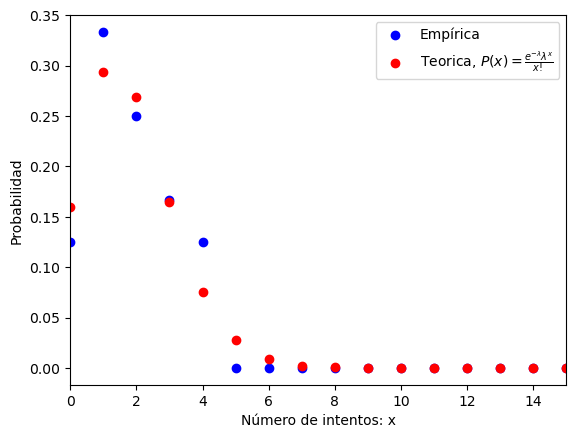

In [17]:
# Comparación entre la curva teórica y empírica
poisson_lambda = 44/24 # el parametro lambda simplemente se saca del numero de nacimientos (44) que hubo en las 24 horas

dist_poisson = st.poisson(mu=poisson_lambda)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(x=df_hour_complete['Hour'],
           y=np.array(y_freq) / 24, # normalizamos a 24 horas para pasar de frecuencia a probabilidad
           color='blue',
           label='Empírica')
ax.scatter(x=df_hour_complete['Hour'],
           y=dist_poisson.pmf(df_hour_complete['Hour']),
           color='red',
           label=r'Teorica, $P(x) = \frac{e^{-\lambda} \lambda^x}{x!}$')
ax.set_xlabel('Número de intentos: x')
ax.set_ylabel('Probabilidad')
ax.set_xlim(0,15)

ax.legend()

plt.show()

Al comparar la distribución empírica del número de nacimientos por hora con la distribución de Poisson teórica, observamos que el modelo se ajusta razonablemente bien. Aunque puede haber pequeñas desviaciones en algunas horas específicas —lo cual es esperable dada la variabilidad natural en datos reales—, la forma general de la distribución y la concentración de probabilidades en torno al valor promedio $\lambda$ se conserva. Esto sugiere que el proceso de nacimientos en este hospital durante ese día puede ser modelado, al menos aproximadamente, como un proceso de Poisson: los nacimientos parecen distribuirse de manera independiente y con una tasa relativamente constante a lo largo del tiempo. Esta observación refuerza el valor práctico de la distribución de Poisson para analizar conteos de eventos en intervalos fijos.

## Distribución Exponencial

La **distribución exponencial** es una distribución continua que modela el **tiempo que transcurre entre eventos consecutivos** en un proceso de Poisson, es decir, cuando los eventos ocurren de forma aleatoria, independiente y a una tasa constante en el tiempo. En nuestro caso, la utilizaremos para modelar el **tiempo entre nacimientos** a lo largo del día. Esta distribución es útil cuando nos interesa saber, por ejemplo, cuál es la probabilidad de que pasen más de 30 minutos entre dos nacimientos, o qué tan probable es que dos nacimientos ocurran con muy poca diferencia de tiempo.

Se denota como:

\begin{equation}
T \sim \text{Exp}(\lambda)
\end{equation}

donde:
- $\lambda$ es la tasa promedio de ocurrencia de eventos (en este caso, nacimientos por minuto),
- $T$ es la variable aleatoria que representa el tiempo entre eventos consecutivos.

#### Función de densidad (PDF)

\begin{equation}
f(t) = \lambda e^{-\lambda t}
\end{equation}

para $t \geq 0$.

#### Propiedades

- **Media**:
  \begin{equation}
  \mu = \frac{1}{\lambda}
  \end{equation}

- **Varianza**:
  \begin{equation}
  \sigma^2 = \frac{1}{\lambda^2}
  \end{equation}


In [18]:
# Creamos los intervalos temporales
interarrival_times = df_baby['Mins'].diff().dropna()  # primera diferencia

Estimamos el parámetro $\lambda$ como $\lambda = \frac{1}{\mu}$, donde la media $\mu$ es la media de estas diferencias temporales.

In [19]:
lambda_exp = 1 / interarrival_times.mean()

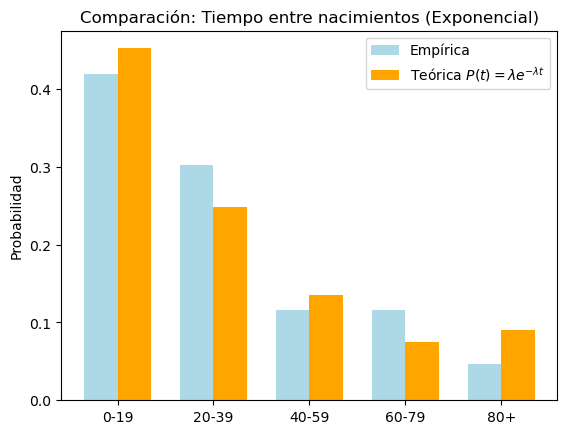

In [20]:
# Histograma empírico
bins = [0, 20, 40, 60, 80, np.inf] # creamos unos intervalos para este histograma
labels = ['0-19', '20-39', '40-59', '60-79', '80+']
freq_empirical = pd.cut(interarrival_times, bins=bins, labels=labels).value_counts().sort_index() # frecuencias
probs_empirical = freq_empirical / freq_empirical.sum() # frecuencias a probabilidad

# Probabilidades teóricas por integración (CDF)
probs_theoretical = []
for i in range(len(bins) - 1):
    a, b = bins[i], bins[i+1]
    p = st.expon.cdf(b, scale=1/lambda_exp) - st.expon.cdf(a, scale=1/lambda_exp) # hacemos uso del método cdf, que calcula el área bajo la curva
    probs_theoretical.append(p)

# variable aleatoria (tiempo de diferencia) y ancho de las barras del histograma
x = np.arange(len(labels))
width = 0.35

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x - width/2, probs_empirical, width=width, label='Empírica', color='lightblue')
ax.bar(x + width/2, probs_theoretical, width=width, label=r'Teórica $P(t) = \lambda e^{-\lambda t}$', color='orange')
ax.set_xticks(x, labels)
ax.set_ylabel('Probabilidad')
ax.set_title('Comparación: Tiempo entre nacimientos (Exponencial)')
ax.legend()
plt.show()

Al analizar los tiempos entre nacimientos y compararlos con la distribución exponencial teórica, observamos que el ajuste es razonablemente bueno. La forma decreciente de las frecuencias empíricas concuerda con el comportamiento esperado de una distribución exponencial: intervalos cortos entre eventos son más probables que los largos. Esto refuerza la idea de que los nacimientos, vistos como eventos puntuales en el tiempo, podrían estar ocurriendo de manera aleatoria e independiente a una tasa constante, como lo asume el modelo de Poisson, Exponencial.

## Distribución Normal

La **distribución normal**, también conocida como distribución gaussiana o campana de Gauss, es una de las distribuciones más importantes en estadística, ya que describe muchos fenómenos naturales, sociales y físicos. Se trata de una distribución **continua y simétrica**, caracterizada por una forma de campana, donde los valores se agrupan alrededor de la media y la probabilidad disminuye conforme nos alejamos de ella. En nuestro caso, utilizaremos esta distribución para modelar el **peso al nacer de los bebés**, con el objetivo de evaluar si los datos se ajustan a un comportamiento aproximadamente normal o presentan sesgos.

Se denota como:

\begin{equation}
X \sim \mathcal{N}(\mu, \sigma^2)
\end{equation}

donde:
- $mu$ es la media (valor esperado),
- $\sigma^2$ es la varianza (dispersión),
- $X$ es la variable aleatoria continua que representa el peso.

#### Función de densidad (PDF)

\begin{equation}
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{- \frac{(x - \mu)^2}{2\sigma^2}}
\end{equation}

#### Propiedades

- La distribución es **simétrica** respecto a la media.
- Aproximadamente el **68%** de los datos cae dentro de una desviación estándar de la media, el **95%** dentro de dos, y el **99.7%** dentro de tres desviaciones (regla empírica o 68-95-99.7).
- Si los datos están distribuidos normalmente, esto puede ser útil para realizar inferencias estadísticas como pruebas de hipótesis o intervalos de confianza.


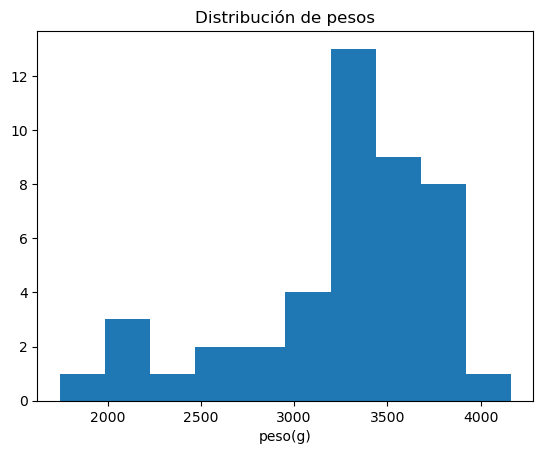

In [21]:
# Histograma simple

plt.hist(df_baby['Weight'])
plt.title('Distribución de pesos')
plt.xlabel('peso(g)')
plt.show()

# No se ve muy gaussiano

Media:  3275.95
Desviación Estándar 528.03


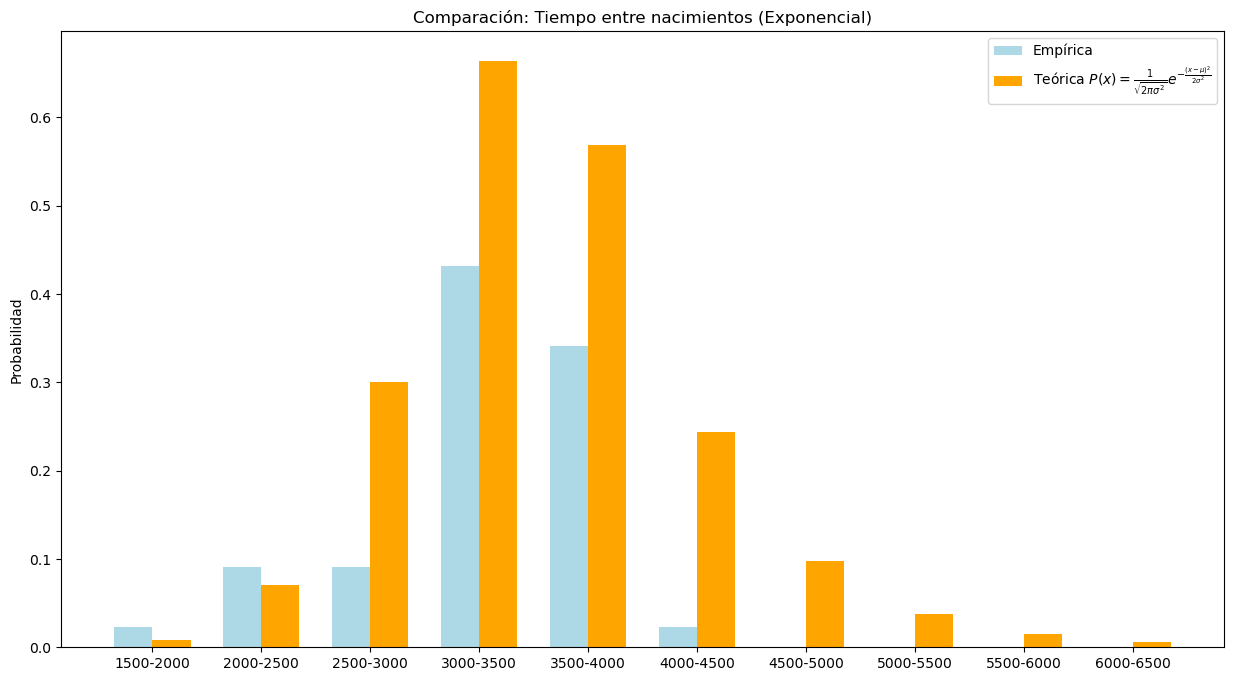

In [22]:
# Hacemos un histograma de los pesos
bins = [1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500]
labels = ['1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000', '5000-5500', '5500-6000', '6000-6500']
freq_empirical = pd.cut(df_baby['Weight'], bins=bins, labels=labels).value_counts().sort_index()
probs_empirical = freq_empirical / freq_empirical.sum()

# Probabilidades teóricas por integración (CDF)
probs_theoretical = []
mu = df_baby['Weight'].mean()
sigma = df_baby['Weight'].std()
print("Media: ", round(mu,2))
print("Desviación Estándar", round(sigma,2))

for i in range(len(bins) - 1):
    a, b = bins[i], bins[i+1]
    p = st.norm.cdf(b,mu,sigma) - st.expon.cdf(a, mu, sigma)
    probs_theoretical.append(p)

x = np.arange(len(labels))
width = 0.35

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.bar(x - width/2, probs_empirical, width=width, label='Empírica', color='lightblue')
ax.bar(x + width/2, probs_theoretical, width=width, label=r'Teórica $P(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{- \frac{(x - \mu)^2}{2\sigma^2}}$', color='orange')
ax.set_xticks(x, labels)
#ax.set_xlim(1500, 6000)
ax.set_ylabel('Probabilidad')
ax.set_title('Comparación: Tiempo entre nacimientos (Exponencial)')
ax.legend()
plt.show()

### Gráfico Q-Q (Quantile-Quantile Plot)

El **gráfico Q-Q** (Quantile-Quantile) es una herramienta visual que nos permite evaluar si un conjunto de datos sigue una distribución teórica determinada, como la normal. Funciona comparando los **cuantiles observados** en los datos con los **cuantiles esperados** bajo la distribución teórica. Si los puntos del gráfico se alinean aproximadamente a lo largo de una línea recta (usualmente la diagonal), podemos concluir que los datos siguen razonablemente bien dicha distribución. En nuestro caso, utilizaremos el gráfico Q-Q para examinar si los pesos al nacer de los bebés se ajustan a una **distribución normal**. Esta visualización complementa otras pruebas estadísticas y nos brinda una forma intuitiva de detectar posibles desviaciones, como asimetría o colas pesadas.

### Prueba de Normalidad de Shapiro-Wilk

Además del gráfico Q-Q, también aplicaremos una prueba estadística formal para evaluar si los datos siguen una distribución normal: la **prueba de Shapiro-Wilk**. Esta prueba es ampliamente utilizada debido a su buena potencia para detectar desviaciones de la normalidad, especialmente en muestras pequeñas o moderadas.

La prueba contrasta las siguientes hipótesis:

- **Hipótesis nula ($H_0$)**: los datos provienen de una distribución normal.
- **Hipótesis alternativa ($H_1$)**: los datos **no** provienen de una distribución normal.

El resultado de la prueba incluye un **estadístico de prueba** y un **valor-p**. Si el valor-p es menor que un umbral predefinido (usualmente 0.05), se **rechaza la hipótesis nula**, lo que indica que los datos muestran evidencia suficiente para concluir que **no se distribuyen normalmente**. En nuestro caso, aplicaremos esta prueba a los pesos al nacer para complementar el análisis visual y tomar una decisión más robusta sobre la adecuación de la distribución normal.


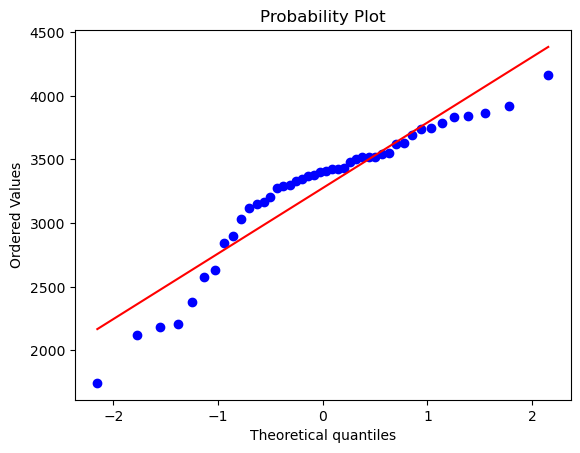

Prueba de Shapiro-Wilk
estadístico W=0.899, p-valor=0.001
Probablemente no es gaussiano




In [23]:
## Q-Q plot con scipy.stats
st.probplot(df_baby['Weight'],
               dist='norm',
               plot=plt)
plt.show()

# Escogemos nivel de significancia para las pruebas de hipótesis.
significance = 0.05

# Se realiza prueba de hipótesis de Shapiro-Wilk
df_baby['Weight_std'] = st.zscore(df_baby['Weight']) # estandarización

stat, p = st.shapiro(df_baby['Weight_std']) # prueba de Shapiro-Wilk con scipy.stats

print('Prueba de Shapiro-Wilk')
print('estadístico W=%.3f, p-valor=%.3f' % (stat,p))

if p > significance:
    print('Probablemente es gaussiano')
else:
    print('Probablemente no es gaussiano')

print('\n')

## Resumen y Conclusiones

Este notebook nos permitió dar un primer paso fundamental: **explorar y entender los comportamientos probabilísticos de los datos reales**. A través del análisis de un conjunto sencillo pero realista de nacimientos, aplicamos diferentes distribuciones de probabilidad clásicas (binomial, geométrica, Poisson, exponencial y normal) para modelar fenómenos específicos como conteos, tiempos entre eventos o la medida continua de pesos. Además, complementamos este análisis con un uso breve de herramientas estadísticas como gráficos QQ y la prueba estadística de Shapiro-Wilk, lo que nos permitió evaluar de forma visual y formal los supuestos de normalidad. 


Este tipo de exploración probabilística es esencial antes de aplicar modelos de aprendizaje automático o inferencia bayesiana, ya que nos ayuda a comprender mejor la **estructura subyacente de los datos**, detectar posibles sesgos, y tomar decisiones informadas sobre la elección de modelos, por ejemplo. A medida que avancemos en el curso, este enfoque basado en la comprensión de la variabilidad y la incertidumbre será clave para construir modelos más robustos, interpretables y coherentes con el fenómeno que deseamos aprender o predecir.
